In [1]:
import os
import random
from collections import defaultdict
from glob import glob
from pathlib import Path
from typing import List
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from torchvision.utils import make_grid

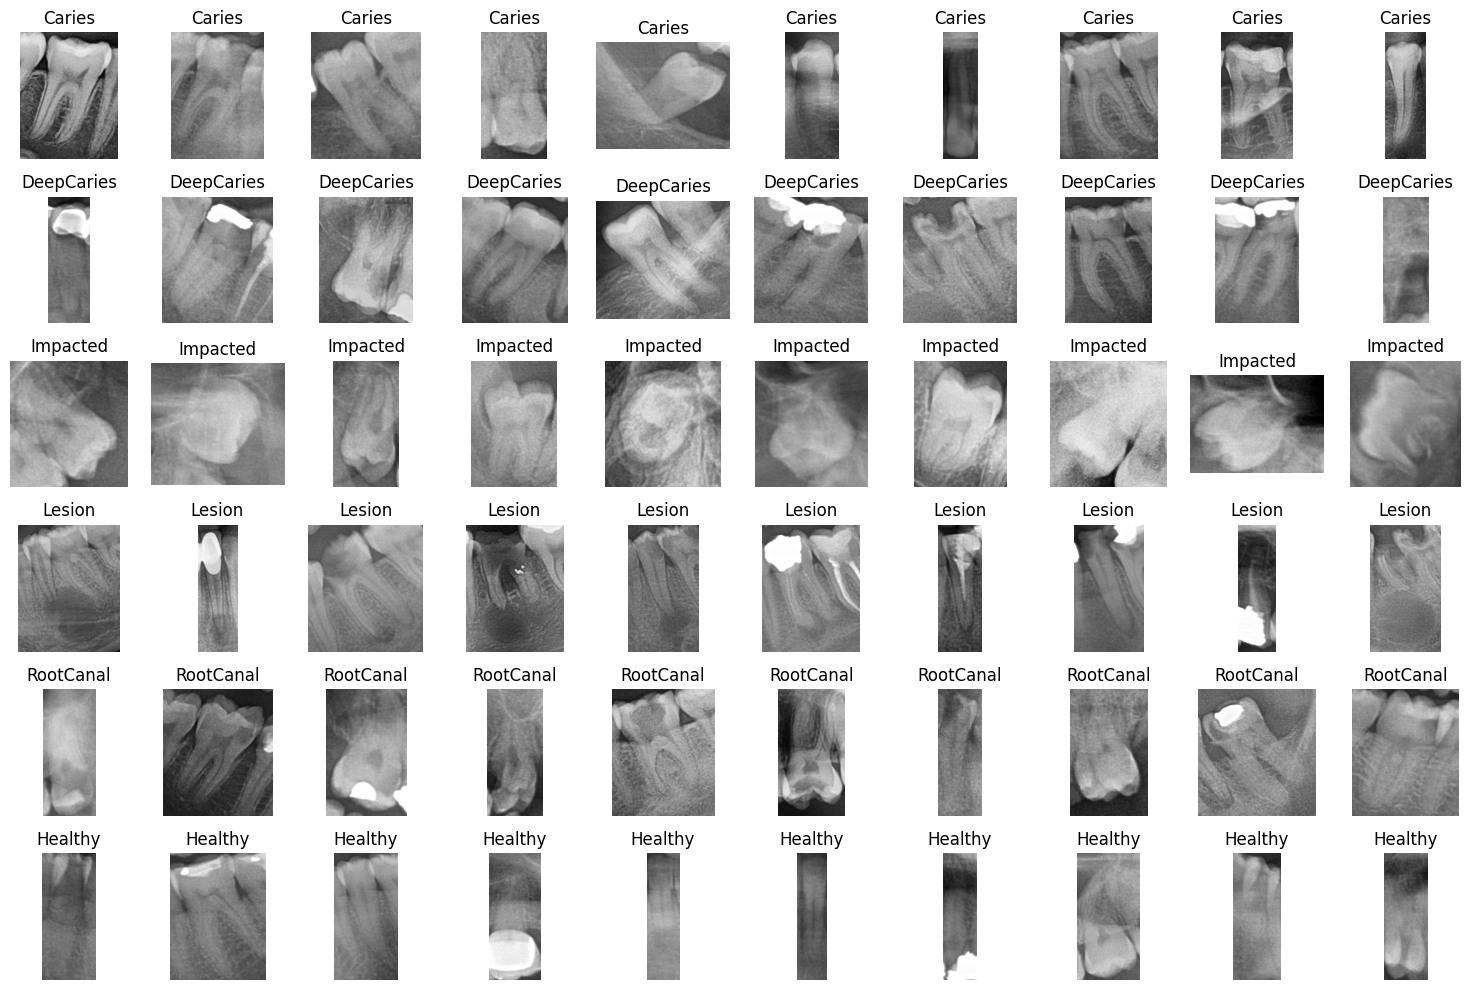

In [2]:
# cv2 pip install
# !pip install opencv-python

# image visualizer library.
# we've got a list of classes and would like to just view a sample of each class.

SUPER_CLASSES = {
    "Caries": ["Caries", "CariesTest"],
    "DeepCaries": ["DeepCaries", "Curettage"],
    "Impacted": ["Impacted"],
    "Lesion": ["PeriapicalLesion", "Lesion"],
    "RootCanal": ["RootCanal"],
    "Healthy": ["Intact"],
}


directory = "./data_test"
directory = "./data"


def visualize_samples_per_class(
    directory: str,
    super_classes: dict,
    samples_per_class: int = 5,
    cols: int = 5,
    figsize: tuple = (15, 10),
):
    """
    Visualize a sample of images for each class in the dataset.

    Args:
        directory (str): Path to the directory containing images.
        super_classes (dict): Dictionary mapping super class names to lists of sub class names.
        samples_per_class (int): Number of samples to display per class.
        cols (int): Number of columns in the grid.
        figsize (tuple): Size of the figure.
    """
    all_images = []
    class_labels = []

    # Get all image files in the directory (no subfolders)
    image_files = glob(os.path.join(directory, "*.jpg")) + glob(
        os.path.join(directory, "*.png")
    )

    for super_class, sub_classes in super_classes.items():
        # Find images that match any of the sub_class names in their filename
        class_images = [
            img
            for img in image_files
            if any(sub_class in os.path.basename(img) for sub_class in sub_classes)
        ]
        if class_images:
            sampled_images = random.sample(
                class_images, min(samples_per_class, len(class_images))
            )
            all_images.extend(sampled_images)
            class_labels.extend([super_class] * len(sampled_images))

    if len(all_images) == 0:
        print(
            f"No images found in the specified directory: {directory} and classes: {super_classes}"
        )
        return

    rows = (len(all_images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for ax, img_path, label in zip(axes, all_images, class_labels):
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.set_title(label)
        ax.axis("off")
    for ax in axes[len(all_images) :]:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
    # save as a figure
    fig.savefig("figures/exploration_samples_per_class.png")


visualize_samples_per_class(
    directory, SUPER_CLASSES, samples_per_class=10, cols=10, figsize=(15, 10)
)